<a href="https://colab.research.google.com/github/EricRibeiroAlves/DeteccaoFakeNews/blob/main/Modelos/%5BAP_T%5D_TI_Modelo_Logic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-5-50ba41695de9>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined'] = df['title'] + " " + df['text']


Acurácia: 0.9869
F1-Score: 0.9862
ROC-AUC: 0.9871

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7091
           1       0.98      0.99      0.99      6379

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



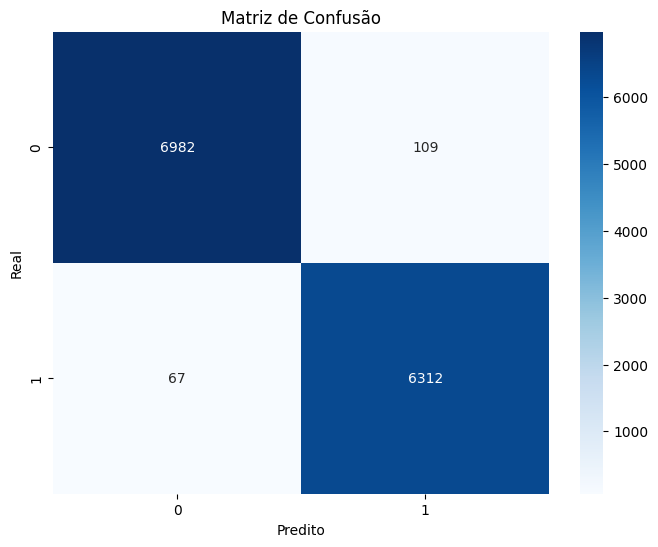

In [5]:
# Importação de Bibliotecas Necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o Dataset ISOT Fake News Dataset
dat_fake = "/content/drive/MyDrive/Eng. Controle e Automação/8º Semestre/AP/dataset_FakeNews/Fake.csv"
dat_real = "/content/drive/MyDrive/Eng. Controle e Automação/8º Semestre/AP/dataset_FakeNews/True.csv"
dt_fake = pd.read_csv(dat_fake)
dt_real = pd.read_csv(dat_real)

# Adicionar rótulos
dt_fake['label'] = 0  # Fake news codificado como 0
dt_real['label'] = 1  # Real news codificado como 1

# Combinar datasets
dt = pd.concat([dt_fake, dt_real], ignore_index=True)

# Seleção de Variáveis de Interesse e combinação de texto e título
df = dt[['title', 'text', 'label']]
df['combined'] = df['title'] + " " + df['text']

# Divisão dos Dados
x_train, x_test, y_train, y_test = train_test_split(
    df['combined'],
    df['label'],
    test_size=0.3,
    random_state=42
)

# Criar e Treinar o Modelo
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
model = LogisticRegression(max_iter=1000, C=1.0)

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

model.fit(x_train_tfidf, y_train)

# Previsão
y_pred = model.predict(x_test_tfidf)

# Avaliação do Modelo
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Métricas
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()